In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Boston housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target: House prices

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print all the errors
print(f"Predicted values: {y_pred[:5]}")  # Show first 5 predictions for brevity
print(f"Actual values: {y_test[:5]}")  # Show first 5 actual values for brevity
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Predicted values: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Actual values: [0.477   0.458   5.00001 2.186   2.78   ]
Mean Absolute Error (MAE): 0.533200130495698
Mean Squared Error (MSE): 0.5558915986952422
Root Mean Squared Error (RMSE): 0.7455813830127749
R-squared (R²): 0.5757877060324524


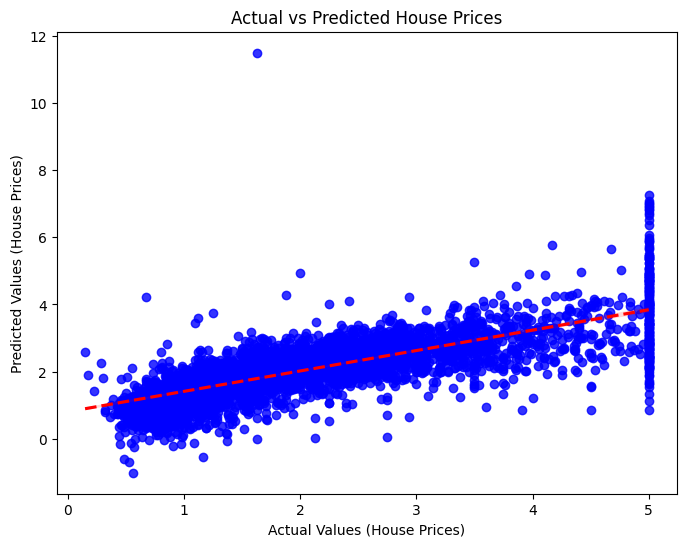

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.xlabel('Actual Values (House Prices)')
plt.ylabel('Predicted Values (House Prices)')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Load the Iris dataset
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0 = Benign, 1 = Malignant)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)






/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1-Score: 0.9655172413793104
Confusion Matrix:
[[39  4]
 [ 1 70]]


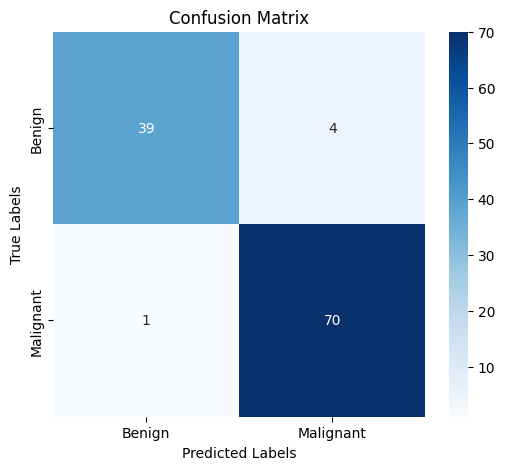

In [ ]:
# Seaborn heatmap for the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

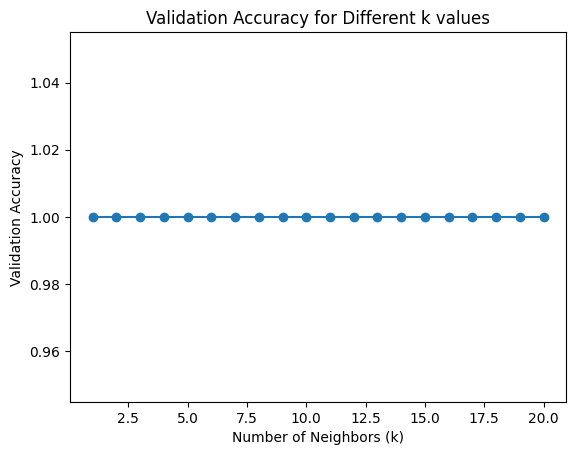

Best k value based on validation set: 1
Final Test Accuracy with k=1: 0.9666666666666667


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# List of different k values to try
k_values = range(1, 21)
validation_accuracies = []

# Try different k values and evaluate on the validation set
for k in k_values:
    # Initialize the k-NN model with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(val_accuracy)

# Plot validation accuracy for different k values
plt.plot(k_values, validation_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different k values')
plt.show()

# Choose the best k (the one with highest validation accuracy)
best_k = k_values[np.argmax(validation_accuracies)]
print(f"Best k value based on validation set: {best_k}")

# Train the model with the best k on the full training set
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Final Test Accuracy with k={best_k}: {test_accuracy}")


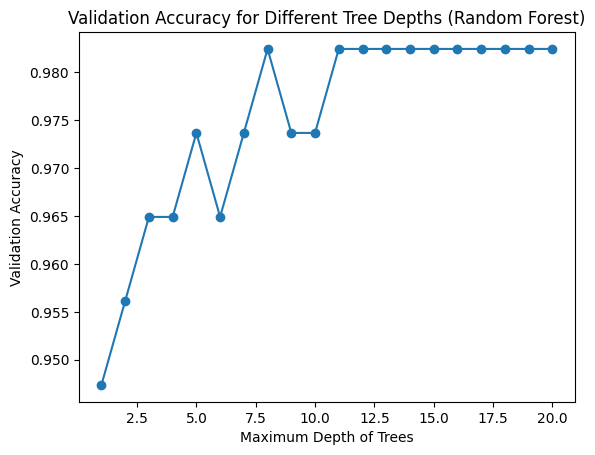

Best tree depth based on validation set: 8
Final Test Accuracy with max_depth=8: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.95      1.00      0.97        76

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0 for malignant, 1 for benign)

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model with different max_depth values
depth_values = range(1, 21)
validation_accuracies = []

for depth in depth_values:
    # Initialize the Random Forest model
    model = RandomForestClassifier(max_depth=depth, random_state=42)

    # Train the model on the training set
    model.fit(X_train_scaled, y_train)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(val_accuracy)

# Plot validation accuracy for different max_depth values
plt.plot(depth_values, validation_accuracies, marker='o')
plt.xlabel('Maximum Depth of Trees')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Tree Depths (Random Forest)')
plt.show()

# Choose the best max_depth value based on validation set
best_depth = depth_values[validation_accuracies.index(max(validation_accuracies))]
print(f"Best tree depth based on validation set: {best_depth}")

# Train the model with the best max_depth on the full training set
best_model = RandomForestClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Final Test Accuracy with max_depth={best_depth}: {test_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
